# **Perspective Warping**

Perspective warping in an image refers to the process of transforming the image such that objects within it appear to be viewed from a different perspective or viewpoint that simulates depth by converging parallel lines and distorting straight lines.

In [ ]:
# import required libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
!pip install -q gdown
import gdown

In [ ]:
!gdown "https://drive.google.com/drive/folders/1V9hfkFwXk4SzeiwEesIsp9fW80glVgfk" -O /content/my_folder --folder

Retrieving folder contents
Retrieving folder 1T7ulNHotpgxlMSnQ2s5WO28klpM2-_-j Caliber
Retrieving folder 1xX0zxi0LCMqc2Edmt7gNoYIAOQzQsZI3 .ipynb_checkpoints
Retrieving folder 1h-gUaiAwA3xIErALFOsbh0DkA_NesI3o dist
Processing file 1XLRV9mc3A227-zh2inDht-LhazcDwcN0 1m.jpg
Processing file 1JwJasyb9rOnwHN_yKGs0ft8WYurv_Onk 2m.jpg
Processing file 1mpvSES7mJ9TizRpSX7pH7b2TLZHYqB_x 3m.jpg
Retrieving folder 1R5EB_mbF-C226uREsNejyS5R1b7zKpxZ manual
Processing file 1Cam_dk8D2VLEt6vsfSz6jj2zHDH2xy8I 1m.jpg
Processing file 13L-E1OU7VqQDys9axYlpi1U5WMkAv7KX 2m.jpg
Processing file 1CsJNTMwSQh3ewTLZjDxAuw68Hi-X79Kt 3m.jpg
Processing file 1yo2tc2kZuvM7JpNVH1aJZMpL5eUNnpyx checkerboard0-200x155.jpg
Processing file 11_HFm6FCihXg6AtW2KtvX0hUVJg0rIy9 checkerboard1-156x200.jpg
Processing file 1QX39Smp3Wb9gwlzh-GMXnOh8alw0xfDP checkerboard2-156x200.jpg
Retrieving folder 1CGNbtn-Vm_Ra5tz3yj-sgEC42gY0LU92 Checker_board
Processing file 1ZeeKNHUlCuWKrXJqKw8daIO3QrSi-MiQ 1m.jpg
Processing file 1tmI8yJ8T6WGYCihJ

In [ ]:
# read the images to perform perspective warping
base_image = cv2.imread('/content/my_folder/base_img.jpg')
base_image_copy = base_image.copy()
subject_image = cv2.imread('/content/my_folder/subject.jpg')

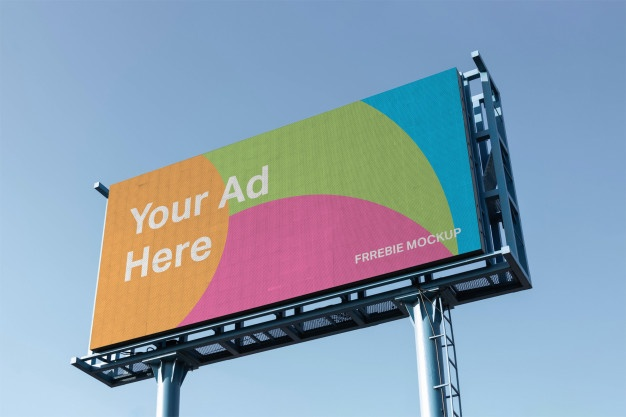

In [ ]:
# display the images
cv2_imshow(base_image)

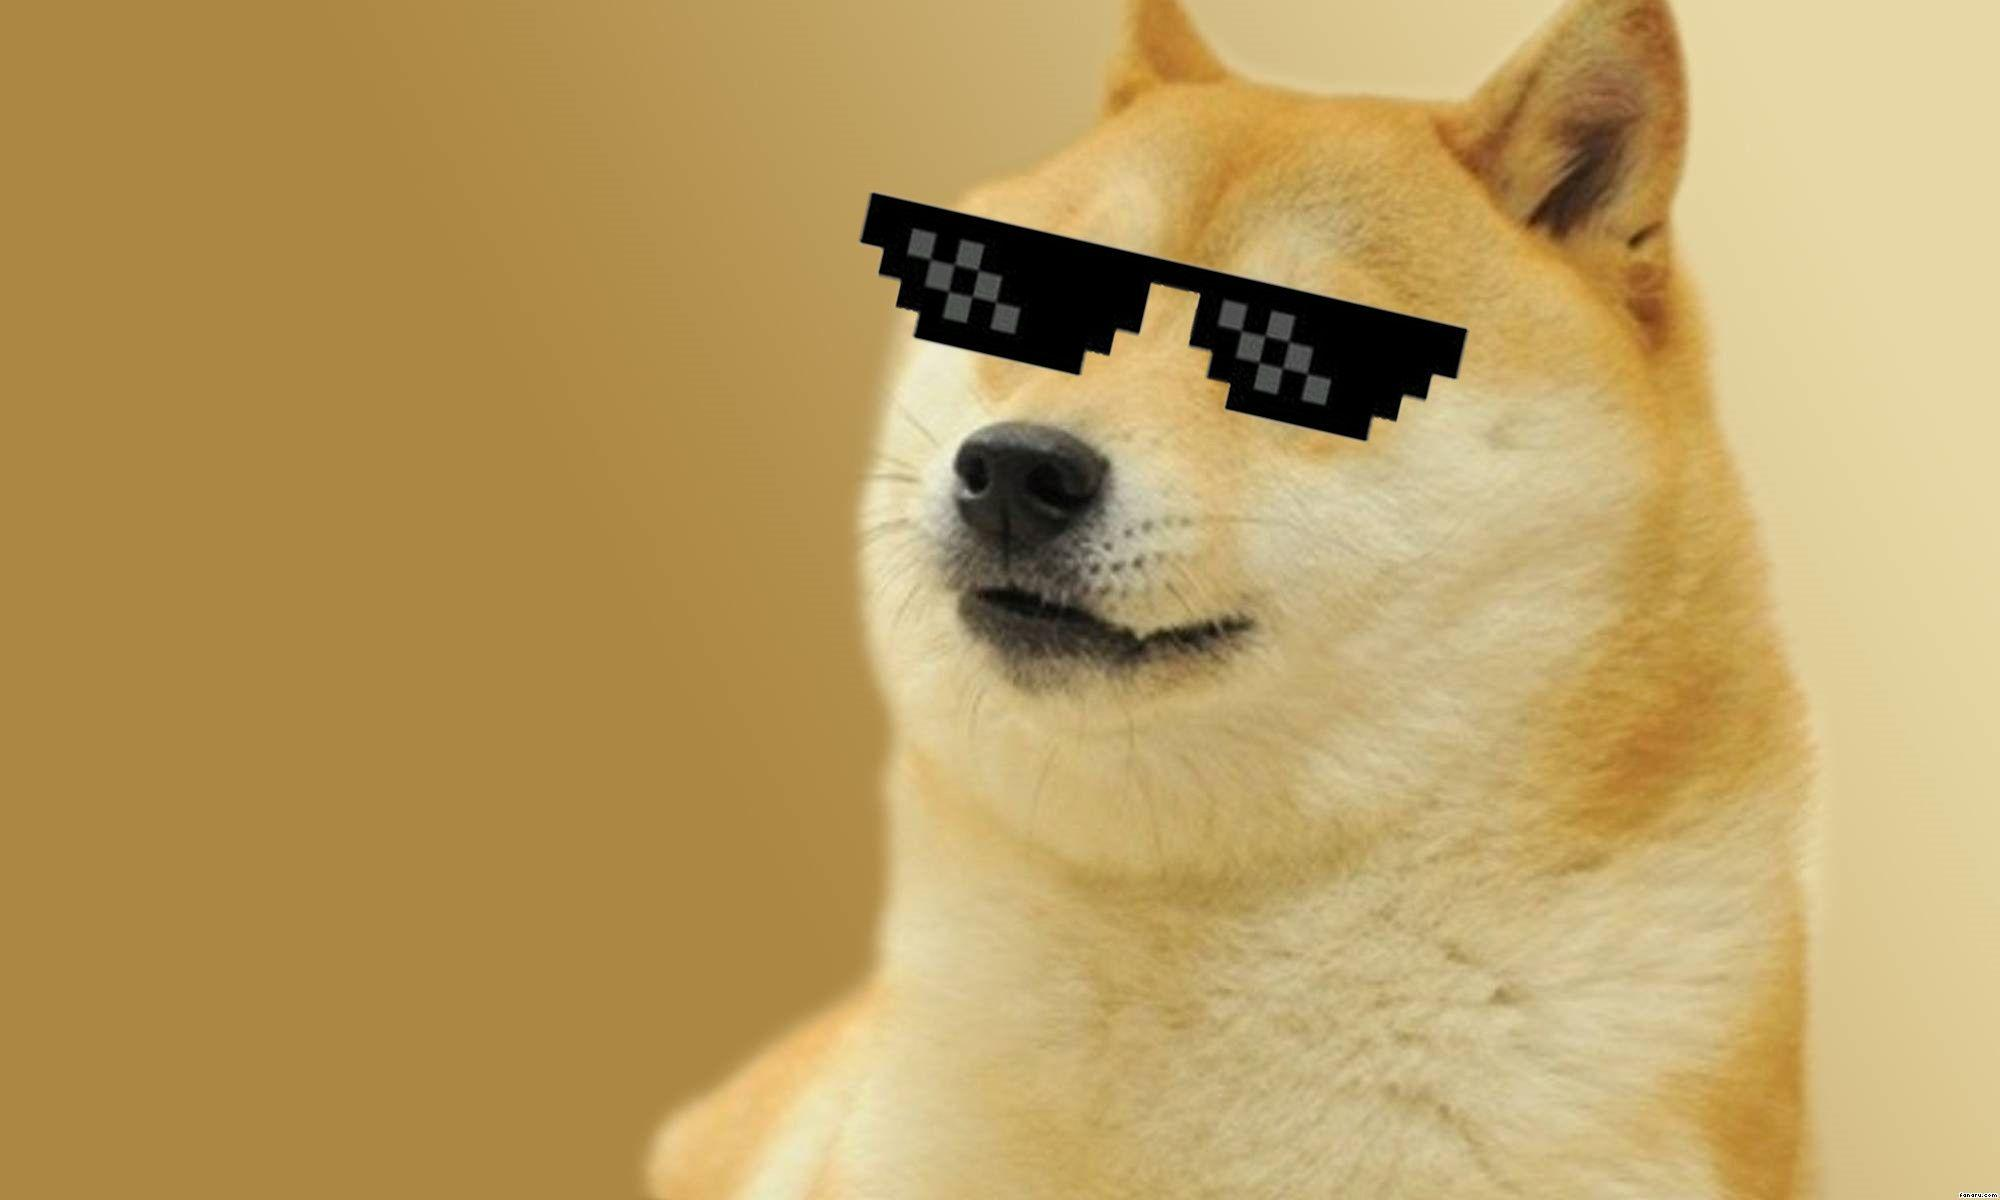

In [ ]:
cv2_imshow(subject_image)

Now let's initialize an array to store the coordinates of the 4 corners within which we want to overlay the subject image.

In [ ]:
print(subject_image.shape)
h,w=subject_image.shape[:2]
print(h,w)

(1200, 2000, 3)
1200 2000


In [ ]:
points = [[108, 186], [456, 70], [480, 249], [91, 351]]


Now let's create 2 arrays calles **'pts1'** which will hold the coordinates of the 4 corners of the subject image, and similarly an array called **'pts2'** which will hold the points/coordinated of the base image.

In [ ]:
pts1= np.array([[0, 0], [w-1, 0], [w-1,h-1 ], [0, h-1]], dtype=np.float32)

pts2=np.array([[108, 186], [456, 70], [480, 249], [91, 351]], dtype=np.float32)

We now obtain the transformation matrix that is required to warp the subject image to fit into the desired coordinated in base image. This is obtained using the function, **cv2.getPerspectiveTransform()**. Since we want to transform the subject image in such a way that it fits the box we chose in the base image, the **"src"** should be **"pts1"** and the **"dst"** should be **"pts2**". The size of the generated image can be specified as a tuple. We make sure the resultant image has the dimensions of the base image. Using the generated matrix we can warp the image using **cv2.warpPerspective()** methods as shown in the code snippet below.

[[ 1.43616558e-01 -2.15523878e-02  1.08000000e+02]
 [-6.27065014e-02  1.09172471e-01  1.86000000e+02]
 [-6.68212406e-05 -8.10319314e-05  1.00000000e+00]]


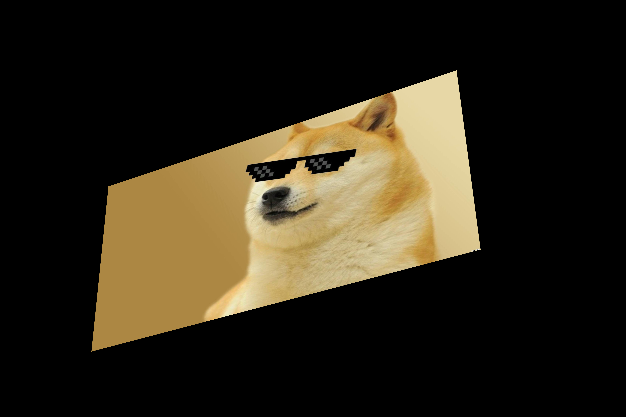

In [ ]:
transformation_matrix = cv2.getPerspectiveTransform(pts1, pts2)

print(transformation_matrix)

h_base, w_base = base_image.shape[:2]
warped_img = cv2.warpPerspective(subject_image, transformation_matrix, (w_base, h_base))
cv2_imshow(warped_img)

The next step is to create a mask for which we create a blank image with the shape of the base image

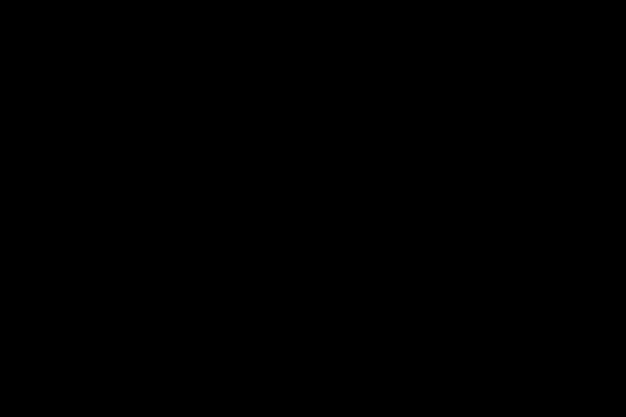

In [ ]:
mask = np.zeros(base_image.shape, dtype=np.uint8)
cv2_imshow(mask)

Onto this blank mask we draw a polygon with corners as chosen in the base image and fill it with white color using the **cv2.fillConvexPoly()** method. The resultant mask would look like this

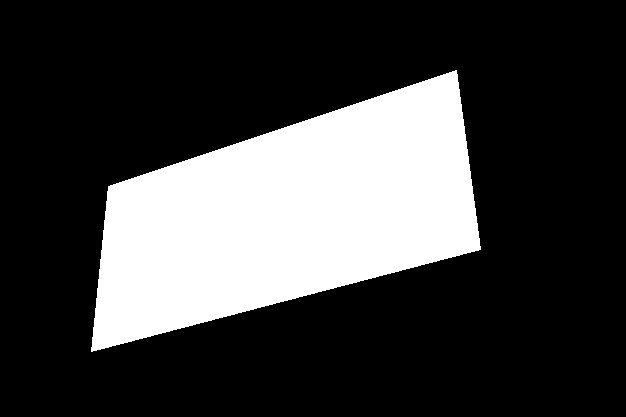

In [ ]:
roi_corners = np.int32(points)

cv2.fillConvexPoly(mask, roi_corners, (255, 255, 255))
cv2_imshow(mask)

Now we invert the mask colors using the **cv2.bitwise_not()** method

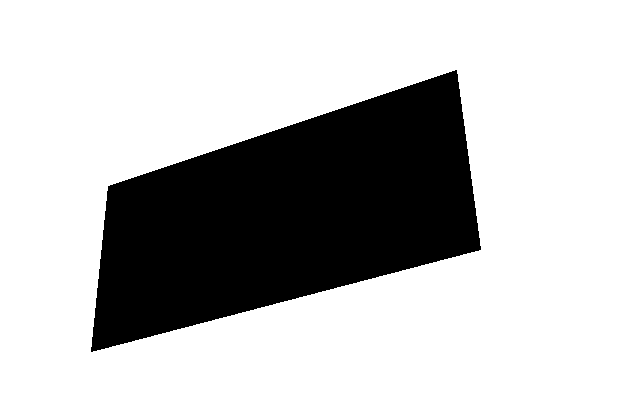

In [ ]:
mask = cv2.bitwise_not(mask)
cv2_imshow(mask)

Now we take the mask and the base image and perform bitwise AND operation uisng the **cv2.bitwise_and()** method

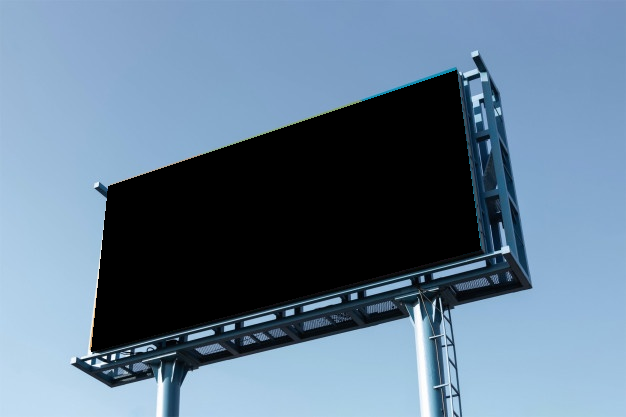

In [ ]:
masked_image = cv2.bitwise_and(base_image, mask)
cv2_imshow(masked_image)

The final step would be to take the warped image and the masked image and perform bitwise-OR operation using the **cv2.bitwise_or()** method. This would generate the fused image we set out to accomplish

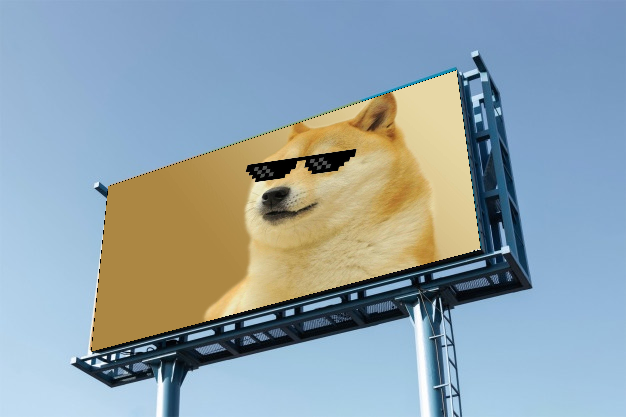

True

In [ ]:
output = cv2.bitwise_or(warped_img, masked_image)
cv2_imshow(output)
cv2.imwrite('Final_Output.png', output)



Perspective (Projective)	3×3	matirx = All affine + perspective distortion

# **Affine Transformation**
In Affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in the output image. Then **cv2.getAffineTransform** will create a 2×3 matrix which is to be passed to **cv2.warpAffine.**

In [ ]:
# importing the required libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading an image
img = cv2.imread('/content/my_folder/chess.png')

# gettings rows, cols and channel dimensions from image
rows, cols, ch = img.shape

Now let's define two matrices that hold the values for source and destination vertices from the source image to the destination image

In [ ]:
pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])

pts2 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]])

Now let's get the Affine Transform matrix using **cv2.getAffineTransform()** and perform Affine Transformation on the image using **cv2.warpAffine()**

In [ ]:
M = cv2.getAffineTransform(pts1, pts2)
print(M)
dst = cv2.warpAffine(img, M, (cols, rows))

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


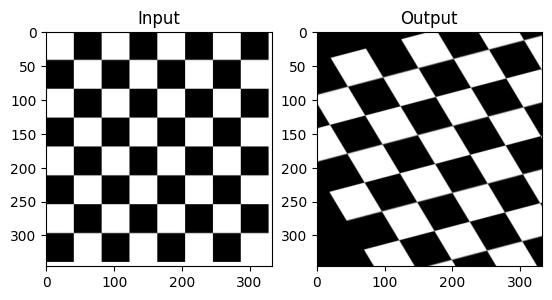

In [ ]:
# display the images
plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

plt.show()

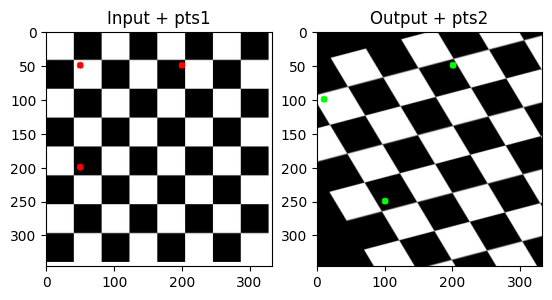

In [ ]:
img_marked = img.copy()
for pt in pts1:
    cv2.circle(img_marked, tuple(pt.astype(int)), 5, (255, 0, 0), -1)  # Red

# Draw points on transformed image
dst_marked = dst.copy()
for pt in pts2:
    cv2.circle(dst_marked, tuple(pt.astype(int)), 5, (0, 255, 0), -1)  # Green

# Show both images
plt.subplot(121)
plt.imshow(img_marked)
plt.title('Input + pts1')

plt.subplot(122)
plt.imshow(dst_marked)
plt.title('Output + pts2')

plt.show()

# **Camera Calibration**
A camera is an integral part of several domains like robotics, space exploration, etc camera is playing a major role. It helps to capture each and every moment and helpful for many analyses. In order to use the camera as a visual sensor, we should know the parameters of the camera. **Camera Calibratio**n is nothing but estimating the parameters of a camera, parameters about the camera are required to determine an accurate relationship between a 3D point in the real world and its corresponding 2D projection (pixel) in the image captured by that calibrated camera.

We need to consider both internal parameters like focal length, optical center, and radial distortion coefficients of the lens etc., and external parameters like rotation and translation of the camera with respect to some real world coordinate system.

**Camera Calibration can be done in a step-by-step approach**:  
**Step 1**: First define real world coordinates of 3D
points using known size of checkerboard pattern.  
**Step 2**: Different viewpoints of check-board image is captured.  
**Step 3**: findChessboardCorners() is a method in OpenCV and used to find pixel coordinates (u, v) for each 3D point in different images  
**Step 4**: Then calibrateCamera() method is used to find camera parameters.  
It will take our calculated (threedpoints, twodpoints, grayColor.shape[::-1], None, None) as parameters and returns list having elements as Camera matrix, Distortion coefficient, Rotation Vectors, and Translation Vectors.

Camera Matrix helps to transform 3D objects points to 2D image points and the Distortion Coefficient returns the position of the camera in the world, with the values of Rotation and Translation vectors

In [ ]:
# importing required libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob


We usually take differnet dimension of rows and cloumns in checkerboard to achieve rotation invariance

In [ ]:
# defining the dimensions of the checkerboard
CHECKERBOARD = (6,9) #6 9

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# cv.TERM_CRITERIA_EPS: Stop the algorithm if an accuracy (epsilon) is reached.  ==0.001
# cv.TERM_CRITERIA_MAX_ITER: Stop the algorithm after a maximum number of iterations. ==30

# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [ ]:
# read the checkerboard images
images = glob.glob('/content/my_folder/Caliber/*.jpg')
print(images)

['/content/my_folder/Caliber/checkerboard0-200x155.jpg', '/content/my_folder/Caliber/checkerboard2-156x200.jpg', '/content/my_folder/Caliber/checkerboard1-156x200.jpg']


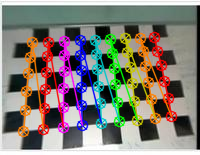

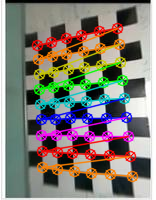

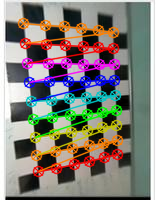

In [ ]:
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true

    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)

    # cv2.CALIB_CB_ADAPTIVE_THRESH:
    # Applies adaptive thresholding to the image to improve corner detection in varying lighting conditions.

    # cv2.CALIB_CB_FAST_CHECK:
    # Quickly rejects images that don’t contain a chessboard. This makes the function faster but might give false negatives.

    # cv2.CALIB_CB_NORMALIZE_IMAGE:
    # Normalizes the image brightness and contrast before processing, helping in poor lighting.

    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board

    if ret == True:
        threedpoints.append(objectp3d)

        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(grayColor, corners, (11, 11), (-1, -1), criteria)

        twodpoints.append(corners2)

        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)
        cv2_imshow( image)



h, w = image.shape[:2]


11x11 patch around corner where we interpolate and calculate sub pixel
(-1, -1) is the value passed for the no zeroZone parameter don’t exclude any area from smoothing.\

In [ ]:
  # Perform camera calibration by
  # passing the value of above found out 3D points (threedpoints)
  # and its corresponding pixel coordinates of the
  # detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(threedpoints, twodpoints, grayColor.shape[::-1], None, None)

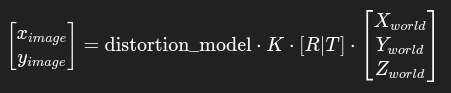

In [ ]:
# Displaying required output
print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

 Camera matrix:
[[25.4055029   0.         84.47356154]
 [ 0.         25.69524088 95.70044375]
 [ 0.          0.          1.        ]]

 Distortion coefficient:
[[-9.31670065e-04  4.16289557e-05 -2.92352895e-03  6.45890201e-04
  -5.39164258e-07]]

 Rotation Vectors:
(array([[-0.06022595],
       [ 0.03655878],
       [ 1.50868489]]), array([[-0.02239329],
       [ 0.05791815],
       [-0.07268439]]), array([[-0.09718987],
       [-0.01116395],
       [ 3.07735217]]))

 Translation Vectors:
(array([[ 4.61254648],
       [-3.78023463],
       [ 1.71710063]]), array([[-3.18135513],
       [-3.47563796],
       [ 1.75032586]]), array([[2.30606751],
       [3.97523073],
       [1.7168886 ]]))


In [ ]:
img = cv2.imread('/content/my_folder/Caliber/checkerboard0-200x155.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))

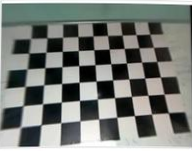

dst


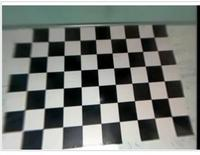

og


In [ ]:
from google.colab.patches import cv2_imshow
# undistort
dst = cv2.undistort(img, matrix, distortion, None, newcameramtx)


# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow( dst)
print('dst')
cv2_imshow(img)
print('og')

In [ ]:
mean_error = 0
for i in range(len(threedpoints)):
    imgpoints2, _ = cv2.projectPoints(threedpoints[i], r_vecs[i], t_vecs[i], matrix, distortion)
    error = cv2.norm(twodpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print( "total error: {}".format(mean_error/len(threedpoints)) )

total error: 0.09445426786289489
